## Import Dependencies

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Import data

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [60]:
df['ra'].describe()

count    6991.000000
mean      292.082406
std         4.762908
min       279.856080
25%       288.704730
50%       292.314760
75%       295.888550
max       301.720760
Name: ra, dtype: float64

### Display disposition count

In [3]:
classified_df = df.groupby("koi_disposition").count()
classified_df.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CANDIDATE,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,...,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
CONFIRMED,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,...,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800
FALSE POSITIVE,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,...,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


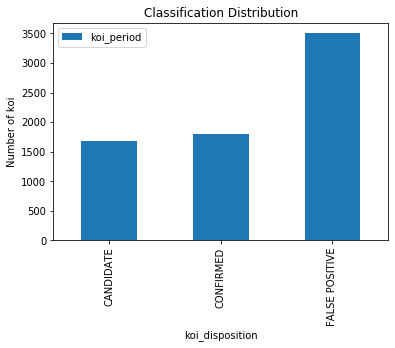

In [11]:
# Plot disposition count
classified_df.plot(kind="bar", y="koi_period", title="Classification Distribution")
plt.xlabel("koi_disposition")
plt.ylabel("Number of koi")

plt.show()

### Plot koi period distribution

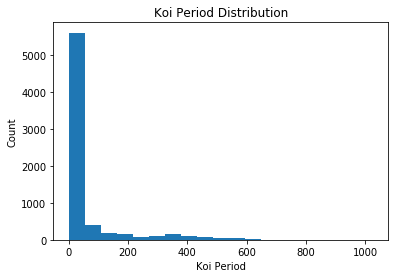

In [41]:
min_koi_period = math.floor(min(df['koi_period']))
max_koi_period = math.ceil(max(df['koi_period'])) + 5
w = math.ceil((max_koi_period - min_koi_period)/20)

bin_list = list(range(min_koi_period, max_koi_period, w))
plt.hist(x=df['koi_period'], bins=bin_list)
plt.title('Koi Period Distribution')
plt.ylabel("Count")
plt.xlabel("Koi Period")

plt.show()

### Plot koi time0bk

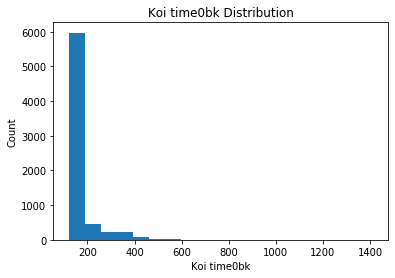

In [42]:
min_koi_time0bk = math.floor(min(df['koi_time0bk']))
max_koi_time0bk = math.ceil(max(df['koi_time0bk'])) + 5
w = math.ceil((max_koi_time0bk - min_koi_time0bk)/20)

bin_list = list(range(min_koi_time0bk, max_koi_time0bk, w))
plt.hist(x=df['koi_time0bk'], bins=bin_list)
plt.title('Koi time0bk Distribution')
plt.ylabel("Count")
plt.xlabel("Koi time0bk")

plt.show()

### Plot koi Impact

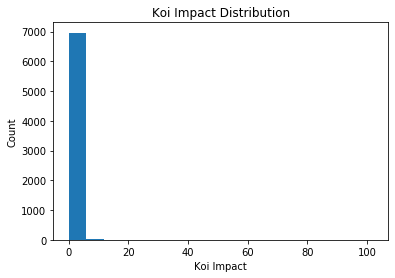

In [47]:
min_koi_impact = math.floor(min(df['koi_impact']))
max_koi_impact = math.ceil(max(df['koi_impact'])) + 5
w = math.ceil((max_koi_impact - min_koi_impact)/20)

bin_list = list(range(min_koi_impact, max_koi_impact, w))
plt.hist(x=df['koi_impact'], bins=bin_list)
plt.title('Koi Impact Distribution')
plt.ylabel("Count")
plt.xlabel("Koi Impact")

plt.show()

### Plot koi duration

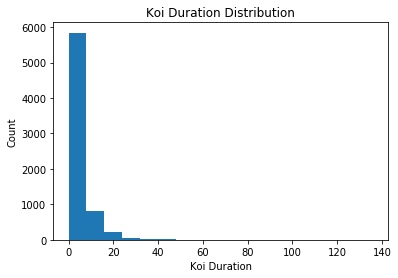

In [48]:
min_koi_duration = math.floor(min(df['koi_duration']))
max_koi_duration = math.ceil(max(df['koi_duration'])) + 5
w = math.ceil((max_koi_duration - min_koi_duration)/20)

bin_list = list(range(min_koi_duration, max_koi_duration, w))
plt.hist(x=df['koi_duration'], bins=bin_list)
plt.title('Koi Duration Distribution')
plt.ylabel("Count")
plt.xlabel("Koi Duration")

plt.show()

### Plot koi Depth

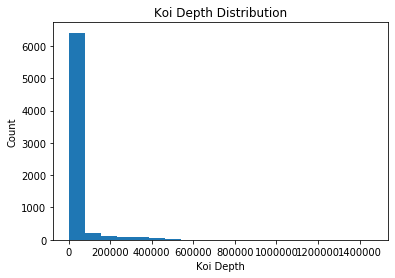

In [49]:
min_koi_depth = math.floor(min(df['koi_depth']))
max_koi_depth = math.ceil(max(df['koi_depth'])) + 5
w = math.ceil((max_koi_depth - min_koi_depth)/20)

bin_list = list(range(min_koi_depth, max_koi_depth, w))
plt.hist(x=df['koi_depth'], bins=bin_list)
plt.title('Koi Depth Distribution')
plt.ylabel("Count")
plt.xlabel("Koi Depth")

plt.show()

### Plot koi prad

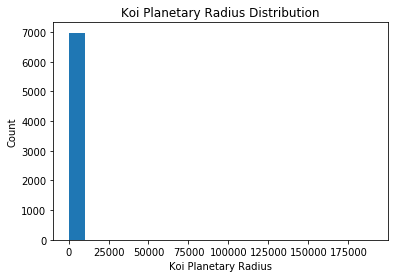

In [52]:
min_koi_prad = math.floor(min(df['koi_prad']))
max_koi_prad = math.ceil(max(df['koi_prad'])) + 5
w = math.ceil((max_koi_prad - min_koi_prad)/20)

bin_list = list(range(min_koi_prad, max_koi_prad, w))
plt.hist(x=df['koi_prad'], bins=bin_list)
plt.title('Koi Planetary Radius Distribution')
plt.ylabel("Count")
plt.xlabel("Koi Planetary Radius")

plt.show()

### Plot koi teq

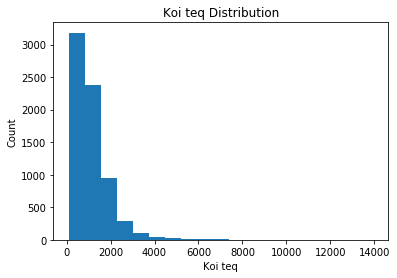

In [54]:
min_koi_teq = math.floor(min(df['koi_teq']))
max_koi_teq = math.ceil(max(df['koi_teq'])) + 5
w = math.ceil((max_koi_teq - min_koi_teq)/20)

bin_list = list(range(min_koi_teq, max_koi_teq, w))
plt.hist(x=df['koi_teq'], bins=bin_list)
plt.title('Koi teq Distribution')
plt.ylabel("Count")
plt.xlabel("Koi teq")

plt.show()

### Plot koi insol

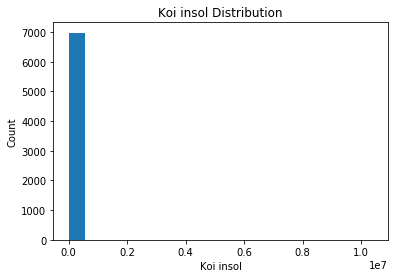

In [55]:
min_koi_insol = math.floor(min(df['koi_insol']))
max_koi_insol = math.ceil(max(df['koi_insol'])) + 5
w = math.ceil((max_koi_insol - min_koi_insol)/20)

bin_list = list(range(min_koi_insol, max_koi_insol, w))
plt.hist(x=df['koi_insol'], bins=bin_list)
plt.title('Koi insol Distribution')
plt.ylabel("Count")
plt.xlabel("Koi insol")

plt.show()

### Plot koi model_snr

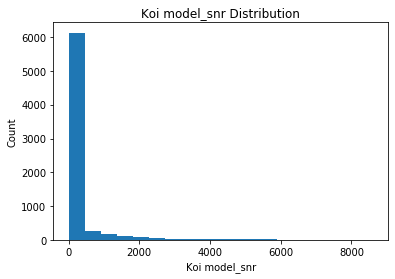

In [56]:
min_koi_model_snr = math.floor(min(df['koi_model_snr']))
max_koi_model_snr = math.ceil(max(df['koi_model_snr'])) + 5
w = math.ceil((max_koi_model_snr - min_koi_model_snr)/20)

bin_list = list(range(min_koi_model_snr, max_koi_model_snr, w))
plt.hist(x=df['koi_model_snr'], bins=bin_list)
plt.title('Koi model_snr Distribution')
plt.ylabel("Count")
plt.xlabel("Koi model_snr")

plt.show()

### Plot koi steff

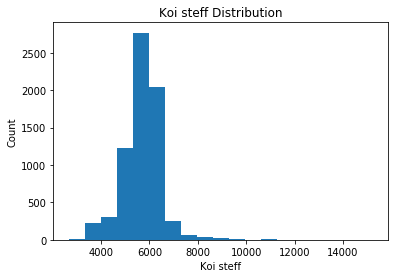

In [57]:
min_koi_steff = math.floor(min(df['koi_steff']))
max_koi_steff = math.ceil(max(df['koi_steff'])) + 5
w = math.ceil((max_koi_steff - min_koi_steff)/20)

bin_list = list(range(min_koi_steff, max_koi_steff, w))
plt.hist(x=df['koi_steff'], bins=bin_list)
plt.title('Koi steff Distribution')
plt.ylabel("Count")
plt.xlabel("Koi steff")

plt.show()

### Plot koi slogg

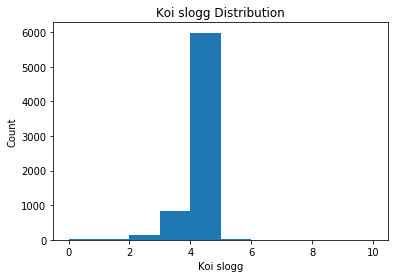

In [58]:
min_koi_slogg = math.floor(min(df['koi_slogg']))
max_koi_slogg = math.ceil(max(df['koi_slogg'])) + 5
w = math.ceil((max_koi_slogg - min_koi_slogg)/20)

bin_list = list(range(min_koi_slogg, max_koi_slogg, w))
plt.hist(x=df['koi_slogg'], bins=bin_list)
plt.title('Koi slogg Distribution')
plt.ylabel("Count")
plt.xlabel("Koi slogg")

plt.show()

### Plot koi srad

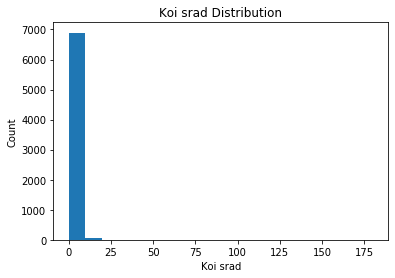

In [59]:
min_koi_srad = math.floor(min(df['koi_srad']))
max_koi_srad = math.ceil(max(df['koi_srad'])) + 5
w = math.ceil((max_koi_srad - min_koi_srad)/20)

bin_list = list(range(min_koi_srad, max_koi_srad, w))
plt.hist(x=df['koi_srad'], bins=bin_list)
plt.title('Koi srad Distribution')
plt.ylabel("Count")
plt.xlabel("Koi srad")

plt.show()

In [ ]:
min_koi_srad = math.floor(min(df['koi_srad']))
max_koi_srad = math.ceil(max(df['koi_srad'])) + 5
w = math.ceil((max_koi_srad - min_koi_srad)/20)

bin_list = list(range(min_koi_srad, max_koi_srad, w))
plt.hist(x=df['koi_srad'], bins=bin_list)
plt.title('Koi srad Distribution')
plt.ylabel("Count")
plt.xlabel("Koi srad")

plt.show()